In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [0]:
df = (pd.read_csv("german.data-numeric", sep='\s+', header=None))
df.dropna(inplace=True)
#print(df.isna().sum())
print(df.head(5))

   0   1   2   3   4   5   6   7   8   9   10  11  ...  13  14  15  16  17  \
0   1   6   4  12   5   5   3   4   1  67   3   2  ...   2   1   0   0   1   
1   2  48   2  60   1   3   2   2   1  22   3   1  ...   1   1   0   0   1   
2   4  12   4  21   1   4   3   3   1  49   3   1  ...   1   1   0   0   1   
3   1  42   2  79   1   4   3   4   2  45   3   1  ...   1   1   0   0   0   
4   1  24   3  49   1   3   3   4   4  53   3   2  ...   1   1   1   0   1   

   18  19  20  21  22  23  24  
0   0   0   1   0   0   1   1  
1   0   0   1   0   0   1   2  
2   0   0   1   0   1   0   1  
3   0   0   0   0   0   1   1  
4   0   0   0   0   0   1   2  

[5 rows x 25 columns]


In [0]:
pd.set_option('display.max_columns', 24)
print(df.describe())
X = df.iloc[:,:24]
y = df.iloc[:,24:25]
X = (X - X.min())/(X.max() - X.min())

                0            1           2            3            4   \
count  1000.000000  1000.000000  1000.00000  1000.000000  1000.000000   
mean      2.577000    20.903000     2.54500    32.711000     2.105000   
std       1.257638    12.058814     1.08312    28.252605     1.580023   
min       1.000000     4.000000     0.00000     2.000000     1.000000   
25%       1.000000    12.000000     2.00000    14.000000     1.000000   
50%       2.000000    18.000000     2.00000    23.000000     1.000000   
75%       4.000000    24.000000     4.00000    40.000000     3.000000   
max       4.000000    72.000000     4.00000   184.000000     5.000000   

                5           6            7            8            9   \
count  1000.000000  1000.00000  1000.000000  1000.000000  1000.000000   
mean      3.384000     2.68200     2.845000     2.358000    35.546000   
std       1.208306     0.70808     1.103718     1.050209    11.375469   
min       1.000000     1.00000     1.000000     1.

In [0]:
df = pd.concat([X,y],axis=1)
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]
X = df.iloc[:,:24]
y= df.iloc[:,24:25]
print(X.describe())

               0           1           2           3           4           5   \
count  821.000000  821.000000  821.000000  821.000000  821.000000  821.000000   
mean     0.550142    0.242208    0.641596    0.152969    0.285932    0.609318   
std      0.422066    0.160141    0.269602    0.123085    0.397116    0.296064   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.117647    0.500000    0.065934    0.000000    0.500000   
50%      0.333333    0.205882    0.500000    0.115385    0.000000    0.500000   
75%      1.000000    0.294118    1.000000    0.197802    0.500000    1.000000   
max      1.000000    0.735294    1.000000    0.626374    1.000000    1.000000   

               6           7           8           9           10          11  \
count  821.000000  821.000000  821.000000  821.000000  821.000000  821.000000   
mean     0.554608    0.616728    0.462038    0.287715    0.842875    0.133577   
std      0.239471    0.3689

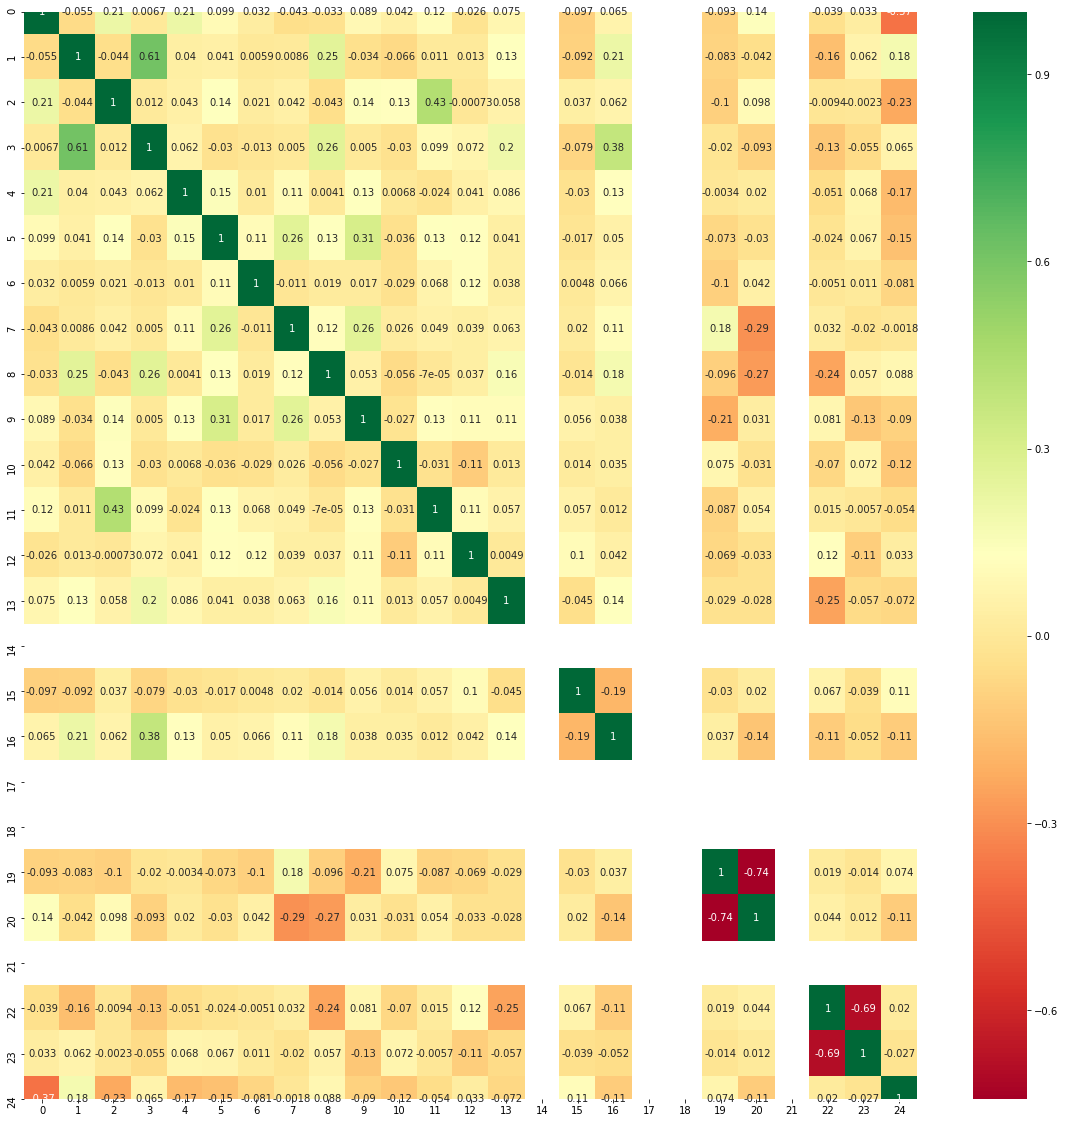

In [0]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
for i in range(10,100,30):
  knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
  knn.fit(X_train, y_train.values.ravel())
  print("Training Accuracy :" + str(knn.score(X_train, y_train)))
  print("Testing Accuracy :" + str(knn.score(X_test, y_test)))

Training Accuracy :1.0
Testing Accuracy :0.7330097087378641
Training Accuracy :1.0
Testing Accuracy :0.7087378640776699
Training Accuracy :1.0
Testing Accuracy :0.7087378640776699


SVM Model for Classification

In [0]:
C_grid = np.logspace(0, 3, 4)
gamma_grid = np.logspace(-2, 1, 4)

In [0]:
for i in range(4):
    for j in range(4):
        C = C_grid[i]
        gamma = gamma_grid[j]
        svm = SVC(C=C, gamma=gamma, kernel='rbf')
        svm.fit(X_train, y_train.values.ravel())
        accuracy = svm.score(X_test, y_test.values.ravel())
        print("%.1f%% test accuracy for C=%.1f gamma=%.2f" % (accuracy*100, C, gamma))

69.9% test accuracy for C=1.0 gamma=0.01
74.8% test accuracy for C=1.0 gamma=0.10
73.8% test accuracy for C=1.0 gamma=1.00
69.9% test accuracy for C=1.0 gamma=10.00
78.2% test accuracy for C=10.0 gamma=0.01
77.2% test accuracy for C=10.0 gamma=0.10
77.2% test accuracy for C=10.0 gamma=1.00
70.9% test accuracy for C=10.0 gamma=10.00
78.6% test accuracy for C=100.0 gamma=0.01
76.2% test accuracy for C=100.0 gamma=0.10
75.2% test accuracy for C=100.0 gamma=1.00
70.9% test accuracy for C=100.0 gamma=10.00
78.2% test accuracy for C=1000.0 gamma=0.01
71.8% test accuracy for C=1000.0 gamma=0.10
75.2% test accuracy for C=1000.0 gamma=1.00
70.9% test accuracy for C=1000.0 gamma=10.00


Logistic Regression for German Credit Card Info

In [0]:
co_reg= np.logspace(-4, 4, 20)
penalty_reg = ['l1','l2']
for pen in penalty_reg:
  for i in co_reg:
    clf = LogisticRegression(random_state=0, solver='liblinear', penalty=pen , C=i).fit(X_train, y_train.values.ravel())
    print(clf.score(X_test, y_test.values.ravel()))

0.6990291262135923
0.6990291262135923
0.6990291262135923
0.6990291262135923
0.6990291262135923
0.6990291262135923
0.6990291262135923
0.6990291262135923
0.7669902912621359
0.7864077669902912
0.7864077669902912
0.7864077669902912
0.7815533980582524
0.7815533980582524
0.7815533980582524
0.7815533980582524
0.7815533980582524
0.7815533980582524
0.7815533980582524
0.7815533980582524
0.6990291262135923
0.6990291262135923
0.6990291262135923
0.6990291262135923
0.6990291262135923
0.6990291262135923
0.6941747572815534
0.7475728155339806
0.7864077669902912
0.7815533980582524
0.7815533980582524
0.7864077669902912
0.7864077669902912
0.7864077669902912
0.7815533980582524
0.7815533980582524
0.7815533980582524
0.7815533980582524
0.7815533980582524
0.7815533980582524


Decision Tree Classifier Model

In [0]:
depth_list = np.linspace(1, 10, 10, endpoint=True)
minSplits_list = np.linspace(0.1, 1.0, 10, endpoint=True)
max_features = list(range(1,X_train.shape[1]))

In [0]:
list_train_results = []
list_test_results = []

for maxdepth in depth_list:
 # for minsamples in minSplits_list:
#for maxfet in max_features
    clf = DecisionTreeClassifier(random_state=0,max_depth=maxdepth)
    clf.fit(X_train,y_train.values.ravel())
    train_pred = clf.predict(X_train)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    #roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    #list_train_results.append(roc_auc)
    #print("Training Auc : " + str(roc_auc))
    #y_pred = clf.predict(x_test)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    #roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    #list_test_results.append(roc_auc)
    #print("Test Auc : " + str(roc_auc))
    print("Training Accuracy :"  +str(clf.score(X_train,y_train.values.ravel())))
    print("Test Accuracy : " + str(clf.score(X_test,y_test.values.ravel())))

Training Accuracy :0.7073170731707317
Test Accuracy : 0.6990291262135923
Training Accuracy :0.7382113821138211
Test Accuracy : 0.7135922330097088
Training Accuracy :0.751219512195122
Test Accuracy : 0.6941747572815534
Training Accuracy :0.775609756097561
Test Accuracy : 0.7524271844660194
Training Accuracy :0.808130081300813
Test Accuracy : 0.7038834951456311
Training Accuracy :0.8439024390243902
Test Accuracy : 0.7233009708737864
Training Accuracy :0.8861788617886179
Test Accuracy : 0.6990291262135923
Training Accuracy :0.9105691056910569
Test Accuracy : 0.6941747572815534
Training Accuracy :0.9398373983739837
Test Accuracy : 0.6796116504854369
Training Accuracy :0.9609756097560975
Test Accuracy : 0.7135922330097088


Random Forest Classification Model

In [0]:
n_estimators = np.linspace(10,100,10)
max_depth = np.linspace(1,6,2)
for est in n_estimators:
  for dep in max_depth:
    clf = RandomForestClassifier(n_estimators=int(est), max_depth=dep,random_state=0).fit(X_train,y_train.values.ravel())
    y_pred = clf.predict(X_test)
    print("Training Accuracy : "+ str(clf.score(X_train, y_train)))
    print("Test Accuracy : " + str(accuracy_score(y_test, y_pred)))

Training Accuracy : 0.7073170731707317
Test Accuracy : 0.6990291262135923
Training Accuracy : 0.8439024390243902
Test Accuracy : 0.7621359223300971
Training Accuracy : 0.7073170731707317
Test Accuracy : 0.6990291262135923
Training Accuracy : 0.8455284552845529
Test Accuracy : 0.7475728155339806
Training Accuracy : 0.7073170731707317
Test Accuracy : 0.6990291262135923
Training Accuracy : 0.848780487804878
Test Accuracy : 0.7330097087378641
Training Accuracy : 0.7073170731707317
Test Accuracy : 0.6990291262135923
Training Accuracy : 0.8536585365853658
Test Accuracy : 0.7378640776699029
Training Accuracy : 0.7073170731707317
Test Accuracy : 0.6990291262135923
Training Accuracy : 0.8666666666666667
Test Accuracy : 0.7330097087378641
Training Accuracy : 0.7073170731707317
Test Accuracy : 0.6990291262135923
Training Accuracy : 0.8682926829268293
Test Accuracy : 0.7378640776699029
Training Accuracy : 0.7073170731707317
Test Accuracy : 0.6990291262135923
Training Accuracy : 0.8715447154471545


In [0]:
Gaussian Naive Bayes Classification Model

In [0]:
clf = GaussianNB()
clf.fit(X_train,y_train.values.ravel())
y_pred = clf.predict(X_test)
print("Training Accuracy : "+ str(clf.score(X_train, y_train)))
print("Test Accuracy : " + str(accuracy_score(y_test, y_pred)))

Training Accuracy : 0.7430894308943089
Test Accuracy : 0.7718446601941747


AdaBoost Classification Model

In [0]:
estimator = np.linspace(10,100,10)
for est in estimator:
  clf = AdaBoostClassifier(n_estimators=int(est), random_state=0,learning_rate=1)
  clf.fit(X_train, y_train.values.ravel())
  print("Training Accuracy : "+ str(clf.score(X_train, y_train)))
  print("Test Accuracy : " + str(clf.score(X_test,y_test)))

Training Accuracy : 0.767479674796748
Test Accuracy : 0.7378640776699029
Training Accuracy : 0.7902439024390244
Test Accuracy : 0.7524271844660194
Training Accuracy : 0.8195121951219512
Test Accuracy : 0.7718446601941747
Training Accuracy : 0.8146341463414634
Test Accuracy : 0.7621359223300971
Training Accuracy : 0.8211382113821138
Test Accuracy : 0.7572815533980582
Training Accuracy : 0.824390243902439
Test Accuracy : 0.7669902912621359
Training Accuracy : 0.8227642276422764
Test Accuracy : 0.7572815533980582
Training Accuracy : 0.824390243902439
Test Accuracy : 0.7572815533980582
Training Accuracy : 0.8227642276422764
Test Accuracy : 0.7621359223300971
Training Accuracy : 0.832520325203252
Test Accuracy : 0.7718446601941747


Neural Networks Clasisifer Model

In [0]:
hiddenLayers = (20,40,60,80,100,120)
learningrate = ['constant', 'invscaling', 'adaptive']
maxIteration = np.linspace(20,200,10)
print(learningrate)
print(maxIteration)
for lr in learningrate:
  for maxIte in maxIteration:
    clf = MLPClassifier(hidden_layer_sizes=hiddenLayers,max_iter=int(maxIte),learning_rate=lr).fit(X_train,y_train.values.ravel()) 
    print("Training Accuracy : "+ str(clf.score(X_train, y_train)))
    print("Test Accuracy : " + str(clf.score(X_test,y_test)))

['constant', 'invscaling', 'adaptive']
[ 20.  40.  60.  80. 100. 120. 140. 160. 180. 200.]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.7365853658536585
Test Accuracy : 0.7621359223300971


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.791869918699187
Test Accuracy : 0.7669902912621359


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8471544715447155
Test Accuracy : 0.7524271844660194


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8390243902439024
Test Accuracy : 0.7621359223300971


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8894308943089431
Test Accuracy : 0.7475728155339806


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.9089430894308943
Test Accuracy : 0.7378640776699029


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (140) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.9739837398373984
Test Accuracy : 0.7427184466019418
Training Accuracy : 0.9333333333333333
Test Accuracy : 0.7524271844660194
Training Accuracy : 0.9203252032520325
Test Accuracy : 0.6747572815533981
Training Accuracy : 0.9723577235772358
Test Accuracy : 0.7524271844660194


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.7691056910569106
Test Accuracy : 0.7524271844660194


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.7821138211382114
Test Accuracy : 0.7766990291262136


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.824390243902439
Test Accuracy : 0.7233009708737864


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8861788617886179
Test Accuracy : 0.7475728155339806


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.9382113821138212
Test Accuracy : 0.7233009708737864


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.9642276422764228
Test Accuracy : 0.8009708737864077


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (140) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.943089430894309
Test Accuracy : 0.7330097087378641


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training Accuracy : 0.9512195121951219
Test Accuracy : 0.7427184466019418
Training Accuracy : 0.9317073170731708
Test Accuracy : 0.7475728155339806
Training Accuracy : 0.7073170731707317
Test Accuracy : 0.6990291262135923


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.7658536585365854
Test Accuracy : 0.7718446601941747


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8065040650406504
Test Accuracy : 0.7718446601941747


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.832520325203252
Test Accuracy : 0.7961165048543689


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training Accuracy : 0.7382113821138211
Test Accuracy : 0.7378640776699029


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8878048780487805
Test Accuracy : 0.7718446601941747


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.9170731707317074
Test Accuracy : 0.7572815533980582


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (140) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.9300813008130081
Test Accuracy : 0.7330097087378641
Training Accuracy : 0.8552845528455284
Test Accuracy : 0.6067961165048543


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training Accuracy : 0.7658536585365854
Test Accuracy : 0.7524271844660194
Training Accuracy : 0.9577235772357724
Test Accuracy : 0.7427184466019418
